In [1]:
import numpy as np
import pandas as pd

from numpy import random
from scipy.stats import dirichlet,poisson
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
import pylab

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
random.seed(1234)

In [2]:
### Create corpus and important_word in each topics ###


### 1.) Creating list of words in observed words ### 


# *** ---- words : important words, observed word, corpus  ---- # 

music_words = ['rock','pop','jazz','hiphop','bodyslam','scrubb','edm','tango','bach','mozart','metal']
food_words = ['softdrink','fastfood','coffee','resaurant','dinner','cuisine','cake','wine','desserts','seafood']
sports_words = ['football','soccer','cricket','racing','tennis','match','tournament','win','loss','score']
idol_words = ['otaku','oshimen','senbatsu','akb48','bnk48','ratah','weeraya','koisuru_fortune_cookie','shonichi',
             'kimi_wa_melody','cherprang','sickachu']

all_topic_imp_words = {'music':music_words,'food':food_words,'sports':sports_words,'idols':idol_words} # * keeping all topci words

# corpus 
all_words = music_words + food_words + sports_words + idol_words


### 2.) Creating each topics's word_distribution - not only "important" word in the topic ###
# topic is a distribution over all words - not only "important" word 

# ------- helper function ----- #

def add_words (min_max,words):
    '''add number of words'''
    return [randint(min_max[0],min_max[1]) for w in range(len(words))]

# *** -------- topic: a words distribution -----------#

all_topic_words_dist_param = {'music_word_dist':{'music':(8,10),'food':(1,3),'sports':(1,3),'idols':(1,3)},
                              'food_word_dist':{'music':(1,3),'food':(8,10),'sports':(1,3),'idols':(1,3)},
                              'sports_word_dist':{'music':(1,3),'food':(1,3),'sports':(8,10),'idols':(1,3)},
                              'idol_word_dist':{'music':(1,3),'food':(1,3),'sports':(1,3),'idols':(8,10)}
                             }


all_topic_words_dist = dict()
all_topic_words_prob = dict()

for topic_word_dist in list(all_topic_words_dist_param.keys()):
    
    param = all_topic_words_dist_param[topic_word_dist]
    word_list = []
    for imp_word in  list(param.keys()):
        word_list += add_words(param[imp_word],all_topic_imp_words[imp_word])
    
    np_words_list = np.array(word_list)
    np_words_prob = np_words_list/np.sum(np_words_list)
    
    all_topic_words_dist[topic_word_dist] = dict(zip(all_words,np_words_list)) # * all topic's word distribution
    all_topic_words_prob[topic_word_dist] = dict(zip(all_words,np_words_prob)) # * all topic's word distribution
    
    
### 3.) Creating User perference from combining all topics togeter - Like a document ### 


# *** ---- document : a word-combination from each topic's words distribution ----- #

pref_all = {'music_lover':{'music':0.7,'food':0.1,'sports':0.1,'idol':0.1},
            'foodie':{'music':0.1,'food':0.7,'sports':0.1,'idol':0.1},
            'sports_man':{'music':0.1,'food':0.1,'sports':0.7,'idol':0.1},
            'idol_otaku':{'music':0.1,'food':0.1,'sports':0.1,'idol':0.7}
           }

In [3]:
# https://towardsdatascience.com/lda-topic-modeling-an-explanation-e184c90aadcd

# Let's generate a word !

# -------- choose a group --------- #
group_name = ['music_lover', 'foodie', 'sports_man', 'idol_otaku']
group_prop = [0.25,0.25,0.25,0.25]
grop_dict = dict(zip(group_name,group_prop)) # fixed
print('group_prop:',grop_dict)
group = random.choice(group_name, p=group_prop)
print('* picked_group:',group)

# ------- choose a topic from per-doc topic distribution based on group ---------#
group_per_topic_prop = pref_all[group] # fixed
print('group_per_topic_prop:',group_per_topic_prop)

prop = np.array(list(group_per_topic_prop.values()))*100
topic_prop = dirichlet(prop).rvs()[0]
print('topic_prop:',topic_prop)
topic_name = list(group_per_topic_prop.keys())
topic = random.choice(topic_name, p=topic_prop)
print('** picked_topic:',topic)

# ------- choose a word from topics and ---------------#
topic = topic+'_word_dist'
topic_word_dist = all_topic_words_dist[topic]
print('topic_word_dist:',all_topic_words_dist[topic])
word_prop = dirichlet(list(topic_word_dist.values())).rvs()[0]
word_name = list(topic_word_dist.keys())
word = random.choice(word_name, p=word_prop)
print('*** picked_word:',word)

group_prop: {'music_lover': 0.25, 'foodie': 0.25, 'sports_man': 0.25, 'idol_otaku': 0.25}
* picked_group: music_lover
group_per_topic_prop: {'music': 0.7, 'food': 0.1, 'sports': 0.1, 'idol': 0.1}
topic_prop: [0.66123303 0.1878114  0.07569784 0.07525773]
** picked_topic: sports
topic_word_dist: {'rock': 2, 'pop': 1, 'jazz': 1, 'hiphop': 3, 'bodyslam': 1, 'scrubb': 3, 'edm': 3, 'tango': 3, 'bach': 1, 'mozart': 2, 'metal': 1, 'softdrink': 3, 'fastfood': 3, 'coffee': 3, 'resaurant': 2, 'dinner': 1, 'cuisine': 3, 'cake': 2, 'wine': 2, 'desserts': 1, 'seafood': 1, 'football': 8, 'soccer': 8, 'cricket': 10, 'racing': 8, 'tennis': 9, 'match': 10, 'tournament': 10, 'win': 8, 'loss': 8, 'score': 8, 'otaku': 1, 'oshimen': 3, 'senbatsu': 3, 'akb48': 3, 'bnk48': 3, 'ratah': 2, 'weeraya': 2, 'koisuru_fortune_cookie': 2, 'shonichi': 2, 'kimi_wa_melody': 1, 'cherprang': 3, 'sickachu': 2}
*** picked_word: match


group_prop: {'music_lover': 0.25, 'foodie': 0.25, 'sports_man': 0.25, 'idol_otaku': 0.25}
* picked_group: idol_otaku
group_per_topic_prop: {'music': 0.1, 'food': 0.1, 'sports': 0.1, 'idol': 0.7}
topic_prop: [0.09173289 0.07555039 0.09484967 0.73786705] 

doc_len: 95
** picked_topic: idol
*** picked_word: metal
** picked_topic: idol
*** picked_word: akb48
** picked_topic: idol
*** picked_word: sickachu
** picked_topic: idol
*** picked_word: akb48
** picked_topic: sports
*** picked_word: senbatsu
** picked_topic: music
*** picked_word: edm
** picked_topic: idol
*** picked_word: weeraya
** picked_topic: idol
*** picked_word: kimi_wa_melody
** picked_topic: idol
*** picked_word: senbatsu
** picked_topic: idol
*** picked_word: score
** picked_topic: music
*** picked_word: cuisine
** picked_topic: idol
*** picked_word: oshimen
** picked_topic: idol
*** picked_word: wine
** picked_topic: idol
*** picked_word: tango
** picked_topic: music
*** picked_word: rock
** picked_topic: food
*** picked_

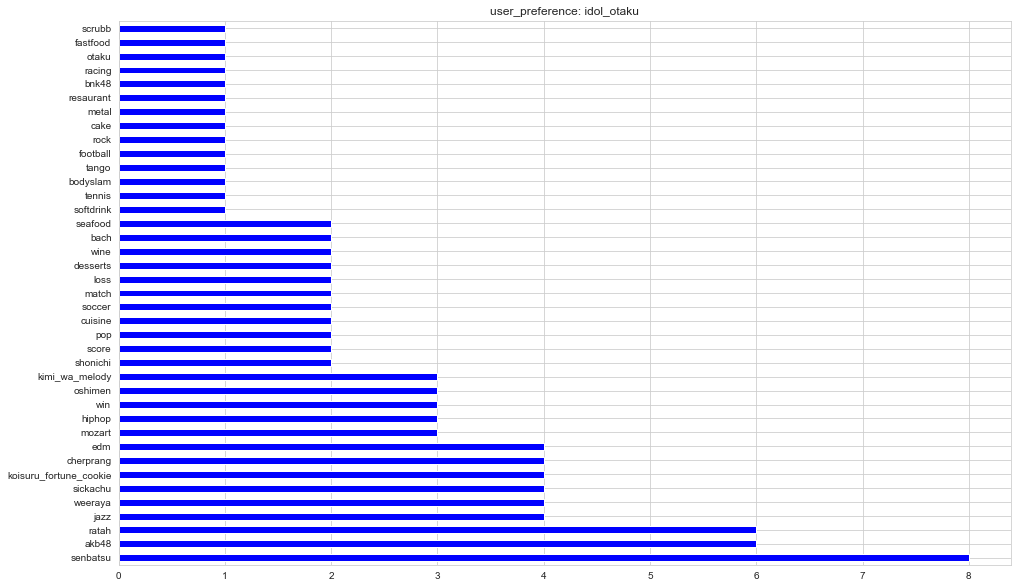

In [4]:
#Let's generate a document !

group_name = ['music_lover', 'foodie', 'sports_man', 'idol_otaku']
group_prop = [0.25,0.25,0.25,0.25]
grop_dict = dict(zip(group_name,group_prop)) # fixed
print('group_prop:',grop_dict)
group = random.choice(group_name, p=group_prop)
print('* picked_group:',group)

group_per_topic_prop = pref_all[group] # fixed
print('group_per_topic_prop:',group_per_topic_prop)
prop = np.array(list(group_per_topic_prop.values()))*100
topic_prop = dirichlet(prop).rvs()[0]
print('topic_prop:',topic_prop,'\n')

doc_len = poisson.rvs(mu=100)
print('doc_len:',doc_len)

topic_name = list(group_per_topic_prop.keys())

doc = []

for n_th in range(doc_len):
    topic = random.choice(topic_name, p=topic_prop)
    print('** picked_topic:',topic)
    
    topic = topic+'_word_dist'
    topic_word_dist = all_topic_words_dist[topic]
    word_prop = dirichlet(list(topic_word_dist.values())).rvs()[0]
    word_name = list(topic_word_dist.keys())
    word = random.choice(word_name, p=word_prop)
    print('*** picked_word:',word)
    
    doc.append(word)
    
# check words in doc
test_doc = pd.Series(doc).value_counts()

# Check muic_lover prefernce based on words distribution

pylab.rcParams['figure.figsize'] = (16, 10)
test_doc.plot(kind='barh',color='b')
_=plt.title('user_preference: '+group)

In [11]:
#Let's generate a 1000 documents with n words per doc !
docs_name = []
docs_contain = []

for n_th_doc in range(10000):
    group_name = ['music_lover', 'foodie', 'sports_man', 'idol_otaku']
    group_prop = [0.25,0.25,0.25,0.25]
    group = random.choice(group_name, p=group_prop) # pick group
    docs_name.append(group)
    
    group_per_topic_prop = pref_all[group] # fixed
    prop = np.array(list(group_per_topic_prop.values()))*100
    topic_prop = dirichlet(prop).rvs()[0] #  "per-doc topic distribution"
    topic_name = list(group_per_topic_prop.keys())
    
    doc_len = poisson.rvs(mu=100)
    doc = []
    for n_th_word in range(doc_len):
        topic = random.choice(topic_name, p=topic_prop) # pick a topic from "per-doc topic distribution"
        topic = topic+'_word_dist'
        topic_word_dist = all_topic_words_dist[topic]
        word_prop = dirichlet(list(topic_word_dist.values())).rvs()[0] # per-topic word distribution conditioned on picked group  
        word_name = list(topic_word_dist.keys())
        word = random.choice(word_name, p=word_prop) # pick a word from "per-topic word distribution"
        
        doc.append(word)
    
    docs_contain.append(doc)
    print(n_th_doc,'_th_doc complete')

0 _th_doc complete
1 _th_doc complete
2 _th_doc complete
3 _th_doc complete
4 _th_doc complete
5 _th_doc complete
6 _th_doc complete
7 _th_doc complete
8 _th_doc complete
9 _th_doc complete
10 _th_doc complete
11 _th_doc complete
12 _th_doc complete
13 _th_doc complete
14 _th_doc complete
15 _th_doc complete
16 _th_doc complete
17 _th_doc complete
18 _th_doc complete
19 _th_doc complete
20 _th_doc complete
21 _th_doc complete
22 _th_doc complete
23 _th_doc complete
24 _th_doc complete
25 _th_doc complete
26 _th_doc complete
27 _th_doc complete
28 _th_doc complete
29 _th_doc complete
30 _th_doc complete
31 _th_doc complete
32 _th_doc complete
33 _th_doc complete
34 _th_doc complete
35 _th_doc complete
36 _th_doc complete
37 _th_doc complete
38 _th_doc complete
39 _th_doc complete
40 _th_doc complete
41 _th_doc complete
42 _th_doc complete
43 _th_doc complete
44 _th_doc complete
45 _th_doc complete
46 _th_doc complete
47 _th_doc complete
48 _th_doc complete
49 _th_doc complete
50 _th_doc

401 _th_doc complete
402 _th_doc complete
403 _th_doc complete
404 _th_doc complete
405 _th_doc complete
406 _th_doc complete
407 _th_doc complete
408 _th_doc complete
409 _th_doc complete
410 _th_doc complete
411 _th_doc complete
412 _th_doc complete
413 _th_doc complete
414 _th_doc complete
415 _th_doc complete
416 _th_doc complete
417 _th_doc complete
418 _th_doc complete
419 _th_doc complete
420 _th_doc complete
421 _th_doc complete
422 _th_doc complete
423 _th_doc complete
424 _th_doc complete
425 _th_doc complete
426 _th_doc complete
427 _th_doc complete
428 _th_doc complete
429 _th_doc complete
430 _th_doc complete
431 _th_doc complete
432 _th_doc complete
433 _th_doc complete
434 _th_doc complete
435 _th_doc complete
436 _th_doc complete
437 _th_doc complete
438 _th_doc complete
439 _th_doc complete
440 _th_doc complete
441 _th_doc complete
442 _th_doc complete
443 _th_doc complete
444 _th_doc complete
445 _th_doc complete
446 _th_doc complete
447 _th_doc complete
448 _th_doc c

796 _th_doc complete
797 _th_doc complete
798 _th_doc complete
799 _th_doc complete
800 _th_doc complete
801 _th_doc complete
802 _th_doc complete
803 _th_doc complete
804 _th_doc complete
805 _th_doc complete
806 _th_doc complete
807 _th_doc complete
808 _th_doc complete
809 _th_doc complete
810 _th_doc complete
811 _th_doc complete
812 _th_doc complete
813 _th_doc complete
814 _th_doc complete
815 _th_doc complete
816 _th_doc complete
817 _th_doc complete
818 _th_doc complete
819 _th_doc complete
820 _th_doc complete
821 _th_doc complete
822 _th_doc complete
823 _th_doc complete
824 _th_doc complete
825 _th_doc complete
826 _th_doc complete
827 _th_doc complete
828 _th_doc complete
829 _th_doc complete
830 _th_doc complete
831 _th_doc complete
832 _th_doc complete
833 _th_doc complete
834 _th_doc complete
835 _th_doc complete
836 _th_doc complete
837 _th_doc complete
838 _th_doc complete
839 _th_doc complete
840 _th_doc complete
841 _th_doc complete
842 _th_doc complete
843 _th_doc c

1178 _th_doc complete
1179 _th_doc complete
1180 _th_doc complete
1181 _th_doc complete
1182 _th_doc complete
1183 _th_doc complete
1184 _th_doc complete
1185 _th_doc complete
1186 _th_doc complete
1187 _th_doc complete
1188 _th_doc complete
1189 _th_doc complete
1190 _th_doc complete
1191 _th_doc complete
1192 _th_doc complete
1193 _th_doc complete
1194 _th_doc complete
1195 _th_doc complete
1196 _th_doc complete
1197 _th_doc complete
1198 _th_doc complete
1199 _th_doc complete
1200 _th_doc complete
1201 _th_doc complete
1202 _th_doc complete
1203 _th_doc complete
1204 _th_doc complete
1205 _th_doc complete
1206 _th_doc complete
1207 _th_doc complete
1208 _th_doc complete
1209 _th_doc complete
1210 _th_doc complete
1211 _th_doc complete
1212 _th_doc complete
1213 _th_doc complete
1214 _th_doc complete
1215 _th_doc complete
1216 _th_doc complete
1217 _th_doc complete
1218 _th_doc complete
1219 _th_doc complete
1220 _th_doc complete
1221 _th_doc complete
1222 _th_doc complete
1223 _th_d

1560 _th_doc complete
1561 _th_doc complete
1562 _th_doc complete
1563 _th_doc complete
1564 _th_doc complete
1565 _th_doc complete
1566 _th_doc complete
1567 _th_doc complete
1568 _th_doc complete
1569 _th_doc complete
1570 _th_doc complete
1571 _th_doc complete
1572 _th_doc complete
1573 _th_doc complete
1574 _th_doc complete
1575 _th_doc complete
1576 _th_doc complete
1577 _th_doc complete
1578 _th_doc complete
1579 _th_doc complete
1580 _th_doc complete
1581 _th_doc complete
1582 _th_doc complete
1583 _th_doc complete
1584 _th_doc complete
1585 _th_doc complete
1586 _th_doc complete
1587 _th_doc complete
1588 _th_doc complete
1589 _th_doc complete
1590 _th_doc complete
1591 _th_doc complete
1592 _th_doc complete
1593 _th_doc complete
1594 _th_doc complete
1595 _th_doc complete
1596 _th_doc complete
1597 _th_doc complete
1598 _th_doc complete
1599 _th_doc complete
1600 _th_doc complete
1601 _th_doc complete
1602 _th_doc complete
1603 _th_doc complete
1604 _th_doc complete
1605 _th_d

1942 _th_doc complete
1943 _th_doc complete
1944 _th_doc complete
1945 _th_doc complete
1946 _th_doc complete
1947 _th_doc complete
1948 _th_doc complete
1949 _th_doc complete
1950 _th_doc complete
1951 _th_doc complete
1952 _th_doc complete
1953 _th_doc complete
1954 _th_doc complete
1955 _th_doc complete
1956 _th_doc complete
1957 _th_doc complete
1958 _th_doc complete
1959 _th_doc complete
1960 _th_doc complete
1961 _th_doc complete
1962 _th_doc complete
1963 _th_doc complete
1964 _th_doc complete
1965 _th_doc complete
1966 _th_doc complete
1967 _th_doc complete
1968 _th_doc complete
1969 _th_doc complete
1970 _th_doc complete
1971 _th_doc complete
1972 _th_doc complete
1973 _th_doc complete
1974 _th_doc complete
1975 _th_doc complete
1976 _th_doc complete
1977 _th_doc complete
1978 _th_doc complete
1979 _th_doc complete
1980 _th_doc complete
1981 _th_doc complete
1982 _th_doc complete
1983 _th_doc complete
1984 _th_doc complete
1985 _th_doc complete
1986 _th_doc complete
1987 _th_d

2319 _th_doc complete
2320 _th_doc complete
2321 _th_doc complete
2322 _th_doc complete
2323 _th_doc complete
2324 _th_doc complete
2325 _th_doc complete
2326 _th_doc complete
2327 _th_doc complete
2328 _th_doc complete
2329 _th_doc complete
2330 _th_doc complete
2331 _th_doc complete
2332 _th_doc complete
2333 _th_doc complete
2334 _th_doc complete
2335 _th_doc complete
2336 _th_doc complete
2337 _th_doc complete
2338 _th_doc complete
2339 _th_doc complete
2340 _th_doc complete
2341 _th_doc complete
2342 _th_doc complete
2343 _th_doc complete
2344 _th_doc complete
2345 _th_doc complete
2346 _th_doc complete
2347 _th_doc complete
2348 _th_doc complete
2349 _th_doc complete
2350 _th_doc complete
2351 _th_doc complete
2352 _th_doc complete
2353 _th_doc complete
2354 _th_doc complete
2355 _th_doc complete
2356 _th_doc complete
2357 _th_doc complete
2358 _th_doc complete
2359 _th_doc complete
2360 _th_doc complete
2361 _th_doc complete
2362 _th_doc complete
2363 _th_doc complete
2364 _th_d

2700 _th_doc complete
2701 _th_doc complete
2702 _th_doc complete
2703 _th_doc complete
2704 _th_doc complete
2705 _th_doc complete
2706 _th_doc complete
2707 _th_doc complete
2708 _th_doc complete
2709 _th_doc complete
2710 _th_doc complete
2711 _th_doc complete
2712 _th_doc complete
2713 _th_doc complete
2714 _th_doc complete
2715 _th_doc complete
2716 _th_doc complete
2717 _th_doc complete
2718 _th_doc complete
2719 _th_doc complete
2720 _th_doc complete
2721 _th_doc complete
2722 _th_doc complete
2723 _th_doc complete
2724 _th_doc complete
2725 _th_doc complete
2726 _th_doc complete
2727 _th_doc complete
2728 _th_doc complete
2729 _th_doc complete
2730 _th_doc complete
2731 _th_doc complete
2732 _th_doc complete
2733 _th_doc complete
2734 _th_doc complete
2735 _th_doc complete
2736 _th_doc complete
2737 _th_doc complete
2738 _th_doc complete
2739 _th_doc complete
2740 _th_doc complete
2741 _th_doc complete
2742 _th_doc complete
2743 _th_doc complete
2744 _th_doc complete
2745 _th_d

3073 _th_doc complete
3074 _th_doc complete
3075 _th_doc complete
3076 _th_doc complete
3077 _th_doc complete
3078 _th_doc complete
3079 _th_doc complete
3080 _th_doc complete
3081 _th_doc complete
3082 _th_doc complete
3083 _th_doc complete
3084 _th_doc complete
3085 _th_doc complete
3086 _th_doc complete
3087 _th_doc complete
3088 _th_doc complete
3089 _th_doc complete
3090 _th_doc complete
3091 _th_doc complete
3092 _th_doc complete
3093 _th_doc complete
3094 _th_doc complete
3095 _th_doc complete
3096 _th_doc complete
3097 _th_doc complete
3098 _th_doc complete
3099 _th_doc complete
3100 _th_doc complete
3101 _th_doc complete
3102 _th_doc complete
3103 _th_doc complete
3104 _th_doc complete
3105 _th_doc complete
3106 _th_doc complete
3107 _th_doc complete
3108 _th_doc complete
3109 _th_doc complete
3110 _th_doc complete
3111 _th_doc complete
3112 _th_doc complete
3113 _th_doc complete
3114 _th_doc complete
3115 _th_doc complete
3116 _th_doc complete
3117 _th_doc complete
3118 _th_d

3456 _th_doc complete
3457 _th_doc complete
3458 _th_doc complete
3459 _th_doc complete
3460 _th_doc complete
3461 _th_doc complete
3462 _th_doc complete
3463 _th_doc complete
3464 _th_doc complete
3465 _th_doc complete
3466 _th_doc complete
3467 _th_doc complete
3468 _th_doc complete
3469 _th_doc complete
3470 _th_doc complete
3471 _th_doc complete
3472 _th_doc complete
3473 _th_doc complete
3474 _th_doc complete
3475 _th_doc complete
3476 _th_doc complete
3477 _th_doc complete
3478 _th_doc complete
3479 _th_doc complete
3480 _th_doc complete
3481 _th_doc complete
3482 _th_doc complete
3483 _th_doc complete
3484 _th_doc complete
3485 _th_doc complete
3486 _th_doc complete
3487 _th_doc complete
3488 _th_doc complete
3489 _th_doc complete
3490 _th_doc complete
3491 _th_doc complete
3492 _th_doc complete
3493 _th_doc complete
3494 _th_doc complete
3495 _th_doc complete
3496 _th_doc complete
3497 _th_doc complete
3498 _th_doc complete
3499 _th_doc complete
3500 _th_doc complete
3501 _th_d

3835 _th_doc complete
3836 _th_doc complete
3837 _th_doc complete
3838 _th_doc complete
3839 _th_doc complete
3840 _th_doc complete
3841 _th_doc complete
3842 _th_doc complete
3843 _th_doc complete
3844 _th_doc complete
3845 _th_doc complete
3846 _th_doc complete
3847 _th_doc complete
3848 _th_doc complete
3849 _th_doc complete
3850 _th_doc complete
3851 _th_doc complete
3852 _th_doc complete
3853 _th_doc complete
3854 _th_doc complete
3855 _th_doc complete
3856 _th_doc complete
3857 _th_doc complete
3858 _th_doc complete
3859 _th_doc complete
3860 _th_doc complete
3861 _th_doc complete
3862 _th_doc complete
3863 _th_doc complete
3864 _th_doc complete
3865 _th_doc complete
3866 _th_doc complete
3867 _th_doc complete
3868 _th_doc complete
3869 _th_doc complete
3870 _th_doc complete
3871 _th_doc complete
3872 _th_doc complete
3873 _th_doc complete
3874 _th_doc complete
3875 _th_doc complete
3876 _th_doc complete
3877 _th_doc complete
3878 _th_doc complete
3879 _th_doc complete
3880 _th_d

4214 _th_doc complete
4215 _th_doc complete
4216 _th_doc complete
4217 _th_doc complete
4218 _th_doc complete
4219 _th_doc complete
4220 _th_doc complete
4221 _th_doc complete
4222 _th_doc complete
4223 _th_doc complete
4224 _th_doc complete
4225 _th_doc complete
4226 _th_doc complete
4227 _th_doc complete
4228 _th_doc complete
4229 _th_doc complete
4230 _th_doc complete
4231 _th_doc complete
4232 _th_doc complete
4233 _th_doc complete
4234 _th_doc complete
4235 _th_doc complete
4236 _th_doc complete
4237 _th_doc complete
4238 _th_doc complete
4239 _th_doc complete
4240 _th_doc complete
4241 _th_doc complete
4242 _th_doc complete
4243 _th_doc complete
4244 _th_doc complete
4245 _th_doc complete
4246 _th_doc complete
4247 _th_doc complete
4248 _th_doc complete
4249 _th_doc complete
4250 _th_doc complete
4251 _th_doc complete
4252 _th_doc complete
4253 _th_doc complete
4254 _th_doc complete
4255 _th_doc complete
4256 _th_doc complete
4257 _th_doc complete
4258 _th_doc complete
4259 _th_d

4589 _th_doc complete
4590 _th_doc complete
4591 _th_doc complete
4592 _th_doc complete
4593 _th_doc complete
4594 _th_doc complete
4595 _th_doc complete
4596 _th_doc complete
4597 _th_doc complete
4598 _th_doc complete
4599 _th_doc complete
4600 _th_doc complete
4601 _th_doc complete
4602 _th_doc complete
4603 _th_doc complete
4604 _th_doc complete
4605 _th_doc complete
4606 _th_doc complete
4607 _th_doc complete
4608 _th_doc complete
4609 _th_doc complete
4610 _th_doc complete
4611 _th_doc complete
4612 _th_doc complete
4613 _th_doc complete
4614 _th_doc complete
4615 _th_doc complete
4616 _th_doc complete
4617 _th_doc complete
4618 _th_doc complete
4619 _th_doc complete
4620 _th_doc complete
4621 _th_doc complete
4622 _th_doc complete
4623 _th_doc complete
4624 _th_doc complete
4625 _th_doc complete
4626 _th_doc complete
4627 _th_doc complete
4628 _th_doc complete
4629 _th_doc complete
4630 _th_doc complete
4631 _th_doc complete
4632 _th_doc complete
4633 _th_doc complete
4634 _th_d

4962 _th_doc complete
4963 _th_doc complete
4964 _th_doc complete
4965 _th_doc complete
4966 _th_doc complete
4967 _th_doc complete
4968 _th_doc complete
4969 _th_doc complete
4970 _th_doc complete
4971 _th_doc complete
4972 _th_doc complete
4973 _th_doc complete
4974 _th_doc complete
4975 _th_doc complete
4976 _th_doc complete
4977 _th_doc complete
4978 _th_doc complete
4979 _th_doc complete
4980 _th_doc complete
4981 _th_doc complete
4982 _th_doc complete
4983 _th_doc complete
4984 _th_doc complete
4985 _th_doc complete
4986 _th_doc complete
4987 _th_doc complete
4988 _th_doc complete
4989 _th_doc complete
4990 _th_doc complete
4991 _th_doc complete
4992 _th_doc complete
4993 _th_doc complete
4994 _th_doc complete
4995 _th_doc complete
4996 _th_doc complete
4997 _th_doc complete
4998 _th_doc complete
4999 _th_doc complete
5000 _th_doc complete
5001 _th_doc complete
5002 _th_doc complete
5003 _th_doc complete
5004 _th_doc complete
5005 _th_doc complete
5006 _th_doc complete
5007 _th_d

5345 _th_doc complete
5346 _th_doc complete
5347 _th_doc complete
5348 _th_doc complete
5349 _th_doc complete
5350 _th_doc complete
5351 _th_doc complete
5352 _th_doc complete
5353 _th_doc complete
5354 _th_doc complete
5355 _th_doc complete
5356 _th_doc complete
5357 _th_doc complete
5358 _th_doc complete
5359 _th_doc complete
5360 _th_doc complete
5361 _th_doc complete
5362 _th_doc complete
5363 _th_doc complete
5364 _th_doc complete
5365 _th_doc complete
5366 _th_doc complete
5367 _th_doc complete
5368 _th_doc complete
5369 _th_doc complete
5370 _th_doc complete
5371 _th_doc complete
5372 _th_doc complete
5373 _th_doc complete
5374 _th_doc complete
5375 _th_doc complete
5376 _th_doc complete
5377 _th_doc complete
5378 _th_doc complete
5379 _th_doc complete
5380 _th_doc complete
5381 _th_doc complete
5382 _th_doc complete
5383 _th_doc complete
5384 _th_doc complete
5385 _th_doc complete
5386 _th_doc complete
5387 _th_doc complete
5388 _th_doc complete
5389 _th_doc complete
5390 _th_d

5725 _th_doc complete
5726 _th_doc complete
5727 _th_doc complete
5728 _th_doc complete
5729 _th_doc complete
5730 _th_doc complete
5731 _th_doc complete
5732 _th_doc complete
5733 _th_doc complete
5734 _th_doc complete
5735 _th_doc complete
5736 _th_doc complete
5737 _th_doc complete
5738 _th_doc complete
5739 _th_doc complete
5740 _th_doc complete
5741 _th_doc complete
5742 _th_doc complete
5743 _th_doc complete
5744 _th_doc complete
5745 _th_doc complete
5746 _th_doc complete
5747 _th_doc complete
5748 _th_doc complete
5749 _th_doc complete
5750 _th_doc complete
5751 _th_doc complete
5752 _th_doc complete
5753 _th_doc complete
5754 _th_doc complete
5755 _th_doc complete
5756 _th_doc complete
5757 _th_doc complete
5758 _th_doc complete
5759 _th_doc complete
5760 _th_doc complete
5761 _th_doc complete
5762 _th_doc complete
5763 _th_doc complete
5764 _th_doc complete
5765 _th_doc complete
5766 _th_doc complete
5767 _th_doc complete
5768 _th_doc complete
5769 _th_doc complete
5770 _th_d

6107 _th_doc complete
6108 _th_doc complete
6109 _th_doc complete
6110 _th_doc complete
6111 _th_doc complete
6112 _th_doc complete
6113 _th_doc complete
6114 _th_doc complete
6115 _th_doc complete
6116 _th_doc complete
6117 _th_doc complete
6118 _th_doc complete
6119 _th_doc complete
6120 _th_doc complete
6121 _th_doc complete
6122 _th_doc complete
6123 _th_doc complete
6124 _th_doc complete
6125 _th_doc complete
6126 _th_doc complete
6127 _th_doc complete
6128 _th_doc complete
6129 _th_doc complete
6130 _th_doc complete
6131 _th_doc complete
6132 _th_doc complete
6133 _th_doc complete
6134 _th_doc complete
6135 _th_doc complete
6136 _th_doc complete
6137 _th_doc complete
6138 _th_doc complete
6139 _th_doc complete
6140 _th_doc complete
6141 _th_doc complete
6142 _th_doc complete
6143 _th_doc complete
6144 _th_doc complete
6145 _th_doc complete
6146 _th_doc complete
6147 _th_doc complete
6148 _th_doc complete
6149 _th_doc complete
6150 _th_doc complete
6151 _th_doc complete
6152 _th_d

6480 _th_doc complete
6481 _th_doc complete
6482 _th_doc complete
6483 _th_doc complete
6484 _th_doc complete
6485 _th_doc complete
6486 _th_doc complete
6487 _th_doc complete
6488 _th_doc complete
6489 _th_doc complete
6490 _th_doc complete
6491 _th_doc complete
6492 _th_doc complete
6493 _th_doc complete
6494 _th_doc complete
6495 _th_doc complete
6496 _th_doc complete
6497 _th_doc complete
6498 _th_doc complete
6499 _th_doc complete
6500 _th_doc complete
6501 _th_doc complete
6502 _th_doc complete
6503 _th_doc complete
6504 _th_doc complete
6505 _th_doc complete
6506 _th_doc complete
6507 _th_doc complete
6508 _th_doc complete
6509 _th_doc complete
6510 _th_doc complete
6511 _th_doc complete
6512 _th_doc complete
6513 _th_doc complete
6514 _th_doc complete
6515 _th_doc complete
6516 _th_doc complete
6517 _th_doc complete
6518 _th_doc complete
6519 _th_doc complete
6520 _th_doc complete
6521 _th_doc complete
6522 _th_doc complete
6523 _th_doc complete
6524 _th_doc complete
6525 _th_d

6855 _th_doc complete
6856 _th_doc complete
6857 _th_doc complete
6858 _th_doc complete
6859 _th_doc complete
6860 _th_doc complete
6861 _th_doc complete
6862 _th_doc complete
6863 _th_doc complete
6864 _th_doc complete
6865 _th_doc complete
6866 _th_doc complete
6867 _th_doc complete
6868 _th_doc complete
6869 _th_doc complete
6870 _th_doc complete
6871 _th_doc complete
6872 _th_doc complete
6873 _th_doc complete
6874 _th_doc complete
6875 _th_doc complete
6876 _th_doc complete
6877 _th_doc complete
6878 _th_doc complete
6879 _th_doc complete
6880 _th_doc complete
6881 _th_doc complete
6882 _th_doc complete
6883 _th_doc complete
6884 _th_doc complete
6885 _th_doc complete
6886 _th_doc complete
6887 _th_doc complete
6888 _th_doc complete
6889 _th_doc complete
6890 _th_doc complete
6891 _th_doc complete
6892 _th_doc complete
6893 _th_doc complete
6894 _th_doc complete
6895 _th_doc complete
6896 _th_doc complete
6897 _th_doc complete
6898 _th_doc complete
6899 _th_doc complete
6900 _th_d

7231 _th_doc complete
7232 _th_doc complete
7233 _th_doc complete
7234 _th_doc complete
7235 _th_doc complete
7236 _th_doc complete
7237 _th_doc complete
7238 _th_doc complete
7239 _th_doc complete
7240 _th_doc complete
7241 _th_doc complete
7242 _th_doc complete
7243 _th_doc complete
7244 _th_doc complete
7245 _th_doc complete
7246 _th_doc complete
7247 _th_doc complete
7248 _th_doc complete
7249 _th_doc complete
7250 _th_doc complete
7251 _th_doc complete
7252 _th_doc complete
7253 _th_doc complete
7254 _th_doc complete
7255 _th_doc complete
7256 _th_doc complete
7257 _th_doc complete
7258 _th_doc complete
7259 _th_doc complete
7260 _th_doc complete
7261 _th_doc complete
7262 _th_doc complete
7263 _th_doc complete
7264 _th_doc complete
7265 _th_doc complete
7266 _th_doc complete
7267 _th_doc complete
7268 _th_doc complete
7269 _th_doc complete
7270 _th_doc complete
7271 _th_doc complete
7272 _th_doc complete
7273 _th_doc complete
7274 _th_doc complete
7275 _th_doc complete
7276 _th_d

7609 _th_doc complete
7610 _th_doc complete
7611 _th_doc complete
7612 _th_doc complete
7613 _th_doc complete
7614 _th_doc complete
7615 _th_doc complete
7616 _th_doc complete
7617 _th_doc complete
7618 _th_doc complete
7619 _th_doc complete
7620 _th_doc complete
7621 _th_doc complete
7622 _th_doc complete
7623 _th_doc complete
7624 _th_doc complete
7625 _th_doc complete
7626 _th_doc complete
7627 _th_doc complete
7628 _th_doc complete
7629 _th_doc complete
7630 _th_doc complete
7631 _th_doc complete
7632 _th_doc complete
7633 _th_doc complete
7634 _th_doc complete
7635 _th_doc complete
7636 _th_doc complete
7637 _th_doc complete
7638 _th_doc complete
7639 _th_doc complete
7640 _th_doc complete
7641 _th_doc complete
7642 _th_doc complete
7643 _th_doc complete
7644 _th_doc complete
7645 _th_doc complete
7646 _th_doc complete
7647 _th_doc complete
7648 _th_doc complete
7649 _th_doc complete
7650 _th_doc complete
7651 _th_doc complete
7652 _th_doc complete
7653 _th_doc complete
7654 _th_d

7985 _th_doc complete
7986 _th_doc complete
7987 _th_doc complete
7988 _th_doc complete
7989 _th_doc complete
7990 _th_doc complete
7991 _th_doc complete
7992 _th_doc complete
7993 _th_doc complete
7994 _th_doc complete
7995 _th_doc complete
7996 _th_doc complete
7997 _th_doc complete
7998 _th_doc complete
7999 _th_doc complete
8000 _th_doc complete
8001 _th_doc complete
8002 _th_doc complete
8003 _th_doc complete
8004 _th_doc complete
8005 _th_doc complete
8006 _th_doc complete
8007 _th_doc complete
8008 _th_doc complete
8009 _th_doc complete
8010 _th_doc complete
8011 _th_doc complete
8012 _th_doc complete
8013 _th_doc complete
8014 _th_doc complete
8015 _th_doc complete
8016 _th_doc complete
8017 _th_doc complete
8018 _th_doc complete
8019 _th_doc complete
8020 _th_doc complete
8021 _th_doc complete
8022 _th_doc complete
8023 _th_doc complete
8024 _th_doc complete
8025 _th_doc complete
8026 _th_doc complete
8027 _th_doc complete
8028 _th_doc complete
8029 _th_doc complete
8030 _th_d

8358 _th_doc complete
8359 _th_doc complete
8360 _th_doc complete
8361 _th_doc complete
8362 _th_doc complete
8363 _th_doc complete
8364 _th_doc complete
8365 _th_doc complete
8366 _th_doc complete
8367 _th_doc complete
8368 _th_doc complete
8369 _th_doc complete
8370 _th_doc complete
8371 _th_doc complete
8372 _th_doc complete
8373 _th_doc complete
8374 _th_doc complete
8375 _th_doc complete
8376 _th_doc complete
8377 _th_doc complete
8378 _th_doc complete
8379 _th_doc complete
8380 _th_doc complete
8381 _th_doc complete
8382 _th_doc complete
8383 _th_doc complete
8384 _th_doc complete
8385 _th_doc complete
8386 _th_doc complete
8387 _th_doc complete
8388 _th_doc complete
8389 _th_doc complete
8390 _th_doc complete
8391 _th_doc complete
8392 _th_doc complete
8393 _th_doc complete
8394 _th_doc complete
8395 _th_doc complete
8396 _th_doc complete
8397 _th_doc complete
8398 _th_doc complete
8399 _th_doc complete
8400 _th_doc complete
8401 _th_doc complete
8402 _th_doc complete
8403 _th_d

8741 _th_doc complete
8742 _th_doc complete
8743 _th_doc complete
8744 _th_doc complete
8745 _th_doc complete
8746 _th_doc complete
8747 _th_doc complete
8748 _th_doc complete
8749 _th_doc complete
8750 _th_doc complete
8751 _th_doc complete
8752 _th_doc complete
8753 _th_doc complete
8754 _th_doc complete
8755 _th_doc complete
8756 _th_doc complete
8757 _th_doc complete
8758 _th_doc complete
8759 _th_doc complete
8760 _th_doc complete
8761 _th_doc complete
8762 _th_doc complete
8763 _th_doc complete
8764 _th_doc complete
8765 _th_doc complete
8766 _th_doc complete
8767 _th_doc complete
8768 _th_doc complete
8769 _th_doc complete
8770 _th_doc complete
8771 _th_doc complete
8772 _th_doc complete
8773 _th_doc complete
8774 _th_doc complete
8775 _th_doc complete
8776 _th_doc complete
8777 _th_doc complete
8778 _th_doc complete
8779 _th_doc complete
8780 _th_doc complete
8781 _th_doc complete
8782 _th_doc complete
8783 _th_doc complete
8784 _th_doc complete
8785 _th_doc complete
8786 _th_d

9121 _th_doc complete
9122 _th_doc complete
9123 _th_doc complete
9124 _th_doc complete
9125 _th_doc complete
9126 _th_doc complete
9127 _th_doc complete
9128 _th_doc complete
9129 _th_doc complete
9130 _th_doc complete
9131 _th_doc complete
9132 _th_doc complete
9133 _th_doc complete
9134 _th_doc complete
9135 _th_doc complete
9136 _th_doc complete
9137 _th_doc complete
9138 _th_doc complete
9139 _th_doc complete
9140 _th_doc complete
9141 _th_doc complete
9142 _th_doc complete
9143 _th_doc complete
9144 _th_doc complete
9145 _th_doc complete
9146 _th_doc complete
9147 _th_doc complete
9148 _th_doc complete
9149 _th_doc complete
9150 _th_doc complete
9151 _th_doc complete
9152 _th_doc complete
9153 _th_doc complete
9154 _th_doc complete
9155 _th_doc complete
9156 _th_doc complete
9157 _th_doc complete
9158 _th_doc complete
9159 _th_doc complete
9160 _th_doc complete
9161 _th_doc complete
9162 _th_doc complete
9163 _th_doc complete
9164 _th_doc complete
9165 _th_doc complete
9166 _th_d

9497 _th_doc complete
9498 _th_doc complete
9499 _th_doc complete
9500 _th_doc complete
9501 _th_doc complete
9502 _th_doc complete
9503 _th_doc complete
9504 _th_doc complete
9505 _th_doc complete
9506 _th_doc complete
9507 _th_doc complete
9508 _th_doc complete
9509 _th_doc complete
9510 _th_doc complete
9511 _th_doc complete
9512 _th_doc complete
9513 _th_doc complete
9514 _th_doc complete
9515 _th_doc complete
9516 _th_doc complete
9517 _th_doc complete
9518 _th_doc complete
9519 _th_doc complete
9520 _th_doc complete
9521 _th_doc complete
9522 _th_doc complete
9523 _th_doc complete
9524 _th_doc complete
9525 _th_doc complete
9526 _th_doc complete
9527 _th_doc complete
9528 _th_doc complete
9529 _th_doc complete
9530 _th_doc complete
9531 _th_doc complete
9532 _th_doc complete
9533 _th_doc complete
9534 _th_doc complete
9535 _th_doc complete
9536 _th_doc complete
9537 _th_doc complete
9538 _th_doc complete
9539 _th_doc complete
9540 _th_doc complete
9541 _th_doc complete
9542 _th_d

9870 _th_doc complete
9871 _th_doc complete
9872 _th_doc complete
9873 _th_doc complete
9874 _th_doc complete
9875 _th_doc complete
9876 _th_doc complete
9877 _th_doc complete
9878 _th_doc complete
9879 _th_doc complete
9880 _th_doc complete
9881 _th_doc complete
9882 _th_doc complete
9883 _th_doc complete
9884 _th_doc complete
9885 _th_doc complete
9886 _th_doc complete
9887 _th_doc complete
9888 _th_doc complete
9889 _th_doc complete
9890 _th_doc complete
9891 _th_doc complete
9892 _th_doc complete
9893 _th_doc complete
9894 _th_doc complete
9895 _th_doc complete
9896 _th_doc complete
9897 _th_doc complete
9898 _th_doc complete
9899 _th_doc complete
9900 _th_doc complete
9901 _th_doc complete
9902 _th_doc complete
9903 _th_doc complete
9904 _th_doc complete
9905 _th_doc complete
9906 _th_doc complete
9907 _th_doc complete
9908 _th_doc complete
9909 _th_doc complete
9910 _th_doc complete
9911 _th_doc complete
9912 _th_doc complete
9913 _th_doc complete
9914 _th_doc complete
9915 _th_d

In [7]:
docs_contain

[['tango',
  'bnk48',
  'scrubb',
  'scrubb',
  'senbatsu',
  'bach',
  'cuisine',
  'coffee',
  'oshimen',
  'cherprang',
  'wine',
  'edm',
  'scrubb',
  'jazz',
  'shonichi',
  'tennis',
  'seafood',
  'akb48',
  'resaurant',
  'rock',
  'senbatsu',
  'wine',
  'softdrink',
  'cherprang',
  'koisuru_fortune_cookie',
  'desserts',
  'koisuru_fortune_cookie',
  'cake',
  'scrubb',
  'metal',
  'weeraya',
  'match',
  'dinner',
  'bach',
  'loss',
  'weeraya',
  'coffee',
  'fastfood',
  'edm',
  'cake',
  'senbatsu',
  'cuisine',
  'match',
  'resaurant',
  'hiphop',
  'oshimen',
  'tournament',
  'resaurant',
  'cuisine',
  'seafood',
  'coffee',
  'racing',
  'ratah',
  'senbatsu',
  'bach',
  'coffee',
  'mozart',
  'seafood',
  'koisuru_fortune_cookie',
  'scrubb',
  'oshimen',
  'tennis',
  'seafood',
  'tournament',
  'seafood',
  'cricket',
  'soccer',
  'cricket',
  'weeraya',
  'otaku',
  'ratah',
  'win',
  'racing',
  'coffee',
  'cricket',
  'metal',
  'bodyslam',
  'shoni

In [12]:
# Prepare data 

jsons = []
for i in range(len(docs_name)):
    line = pd.Series(docs_contain[i]).value_counts()
    json = dict(zip(list(line.index),list(line.values)))
    json['user_pref'] = docs_name[i]
    jsons.append(json)
    
# save data 
pd.DataFrame(jsons).fillna(0).to_csv('test_user_pref_count_20190607_10000_100.csv',index=False)